In [94]:
import numpy as np
import pandas as pd
from ggplot import mtcars
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
matplotlib.style.use('ggplot')
import warnings
from ggplot import *
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

## Apriori algorithm data mining - Market Basket Analysis. 					             
http://software.ucv.ro/~cmihaescu/ro/teaching/AIR/docs/Lab8-Apriori.pdf
<br>


In [96]:
mb = pd.read_csv('market_basket.csv')

In [97]:
def transform(x, y):
    if x == 1:
        return y.name
    else:
        return 0

In [98]:
mb['milk'] = mb.milk.apply (lambda row: transform (row, mb.milk ))
mb['Bread'] = mb.Bread.apply (lambda row: transform (row , mb.Bread ))
mb['butter'] = mb.butter.apply (lambda row: transform (row , mb.butter ))
mb['beer'] = mb.beer.apply (lambda row: transform (row , mb.beer ))

mb = mb.drop('Transaction_ID',1)
mb_l = mb.values.tolist()

In [99]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [100]:
empty = []
for x in mb_l:
    empty.append(remove_values_from_list(x, 0))

In [101]:
empty

[['milk', 'Bread'],
 ['Bread', 'butter'],
 ['beer'],
 ['milk', 'Bread', 'butter'],
 ['Bread'],
 ['milk'],
 ['Bread', 'butter', 'beer'],
 ['milk', 'Bread', 'butter', 'beer'],
 ['Bread', 'beer'],
 ['milk', 'Bread'],
 ['milk'],
 ['beer'],
 ['milk', 'Bread', 'butter'],
 ['milk', 'butter'],
 ['milk', 'Bread', 'butter', 'beer']]

In [102]:
from apyori import apriori

results = list(apriori(empty))

In [103]:
print ("Aprioi Top 5 Rules (that are not the item itself) : ")
for x in results[5:10]:
    print (x)
    print ("----")

Aprioi Top 5 Rules (that are not the item itself) : 
RelationRecord(items=frozenset({'butter', 'Bread'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bread'}), items_add=frozenset({'butter'}), confidence=0.6000000000000001, lift=1.2857142857142858), OrderedStatistic(items_base=frozenset({'butter'}), items_add=frozenset({'Bread'}), confidence=0.8571428571428572, lift=1.2857142857142858)])
----
RelationRecord(items=frozenset({'milk', 'Bread'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bread'}), items_add=frozenset({'milk'}), confidence=0.6000000000000001, lift=1.0000000000000002), OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'Bread'}), confidence=0.6666666666666667, lift=1.0000000000000002)])
----
RelationRecord(items=frozenset({'butter', 'beer'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beer'}), items_add=frozenset({'butter'}), confidence=0.5, lift=1.0714285714285714), 

Define Sensitivity and Specificity of a Classifier.  How does a ROC curve assess the performance of a Classifier?  Explain using a diagram, and the below data plotted as ROC.

In [121]:
df = pd.read_csv('microscope.csv')

In [124]:
df

,Microscope setting,% of virus strains detected,% of virus strains correctly identified
0,Off,0,100
1,Setting 1,35,93
2,Setting 2,60,85
3,Setting 3,85,70
4,Setting 4,92,30
5,Full,100,0


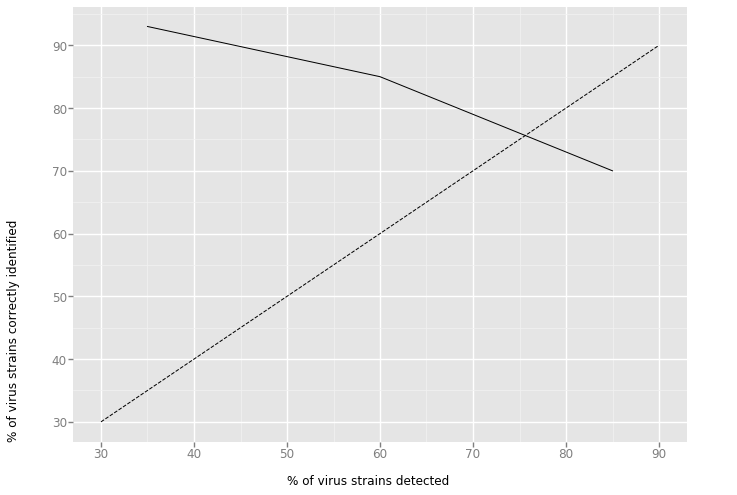

<ggplot: (299188088)>

In [123]:
ggplot(df[1:4], aes(y='% of virus strains correctly identified ', x='% of virus strains detected ')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

This ROC curve seems to be not be a good classifier, although I cannot get it to look like normal ROC curves. 

## Using R, conduct K-means Clustering Analysis on the mtcars dataset (without including the Car name - first attribute).  Follow he below tutorial for R implementation:   [25 points]
https://www.r-bloggers.com/k-means-clustering-from-r-in-action/ 


In [107]:
mtcars.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb', 'cluster'],
      dtype='object')

In [108]:
X = mtcars[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb']]

In [109]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X )
    cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )


Elbow Method: Chosing the Optimal K in K Means Clustering

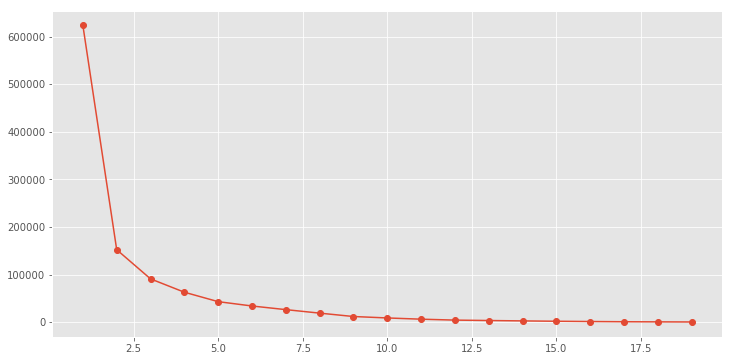

In [110]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

The elbow method shows that there are optimally around 2 clusters. 

In [111]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
mtcars['cluster'] = kmeans.predict(X)

In [112]:
y_kmeans

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

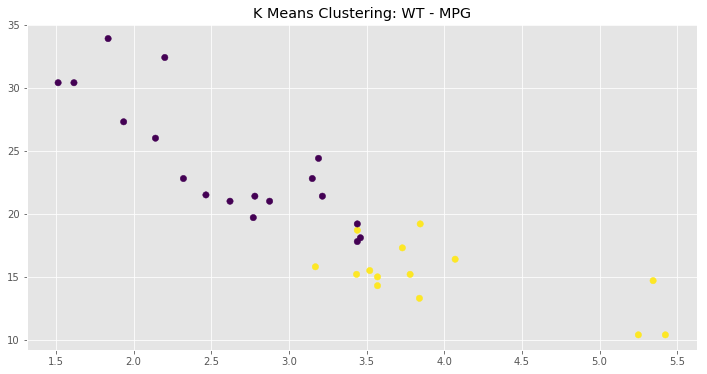

In [113]:
plt.figure(figsize=(12,6))
plt.scatter(mtcars['wt'], mtcars['mpg'], c=mtcars['cluster'], s=40)
plt.title("K Means Clustering: WT - MPG")

## mtcars data, implement ROC and AUC for comparison of Classifiers, based on the following tutorial:
https://www.r-bloggers.com/illustrated-guide-to-roc-and-auc/


In [147]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

mtcars['is_train'] = np.random.uniform(0, 1, len(mtcars)) <= .75
train, test = mtcars[mtcars['is_train'] == True], mtcars[mtcars['is_train'] == False]
features = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs','gear', 'carb']
y = train['am']
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Here is the feature importance of the random forrest classifier:

In [148]:
list(zip(train[features], clf.feature_importances_))

[('mpg', 0.046428571428571416),
 ('cyl', 0.0),
 ('disp', 0.10390720390720391),
 ('hp', 0.061904761904761893),
 ('drat', 0.29722222222222222),
 ('wt', 0.23818958818958821),
 ('qsec', 0.11883116883116882),
 ('vs', 0.053571428571428582),
 ('gear', 0.025000000000000001),
 ('carb', 0.054945054945054951)]

In [149]:
preds = clf.predict(test[features])

ROC Curve:

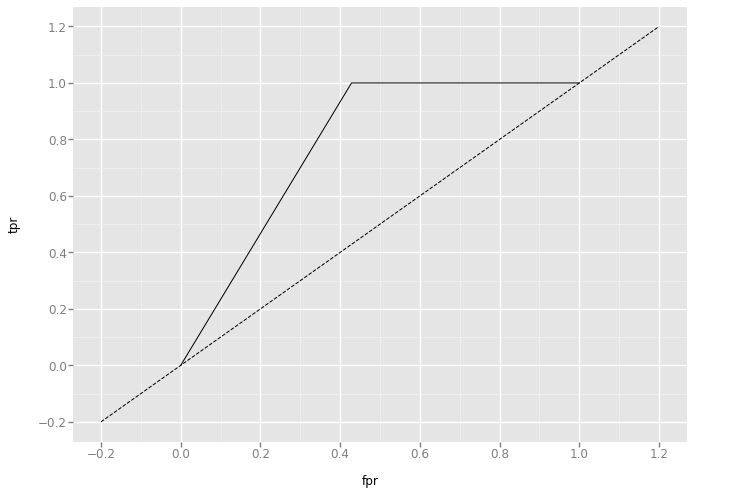

<ggplot: (-9223372036555092757)>

In [150]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(test['am'], preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

AUC: Area Under the Curve of ROC:

In [151]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test['am'], preds)

0.7857142857142857

This seems like a faily good AUC score for this random forrest classifier, but I am not sure how to decide if it beats pure chance. 

In [152]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier


num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=7)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=7)
model.fit(train[features], y)
results = model_selection.cross_val_score(model, train[features], y, cv=kfold)
print(results.mean())

0.75


In [153]:
preds = model.predict(test[features])

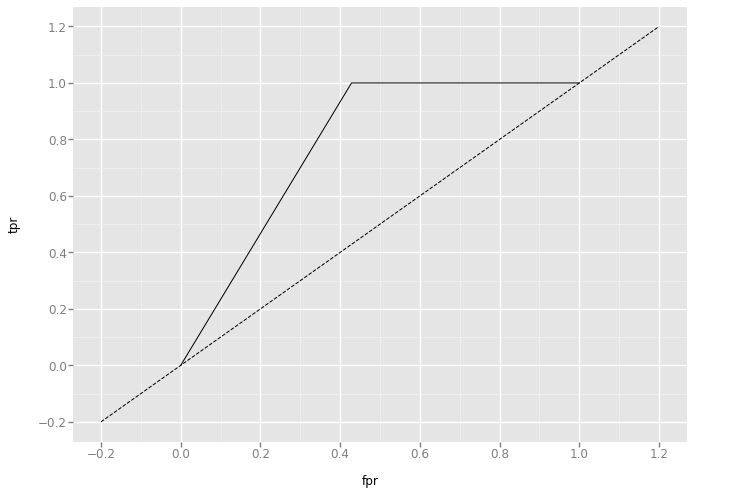

<ggplot: (-9223372036555092967)>

In [154]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(test['am'], preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [155]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test['am'], preds)

0.7857142857142857